<a href="https://colab.research.google.com/github/Reza137905/CRD-Deep/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

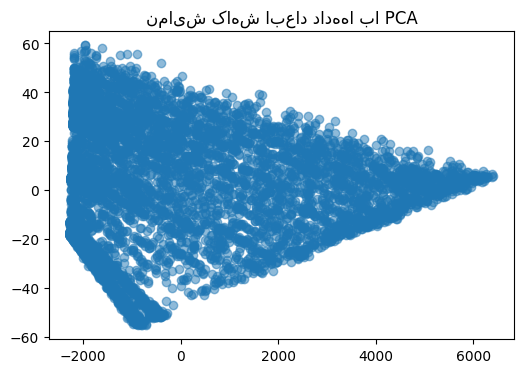

  0%|          | 0/1 [00:00<?, ?it/s]

مقادیر SHAP برای نمونه اول:
 [[[ 0.          0.        ]
  [-0.01125216  0.01125216]
  [ 0.          0.        ]
  [-0.00608376  0.00608376]
  [-0.01538887  0.01538887]
  [ 0.          0.        ]
  [ 0.00650711 -0.00650711]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [-0.01393395  0.01393395]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.00914417 -0.00914417]
  [ 0.01305287 -0.01305287]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.00017575 -0.00017575]
  [-0.06209274  0.06209274]
  [-0.01344951  0.01344951]]]
داده‌های پردازش‌شده:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

 

In [1]:
# ===============================
# نصب کتابخانه‌های مورد نیاز
# ===============================
!pip install pandas numpy scikit-learn matplotlib shap torch cryptography requests

import os
import pandas as pd
import joblib
import requests
import io
import numpy as np
import torch
import torch.nn as nn
import hashlib
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from cryptography.fernet import Fernet

# ===============================
# تنظیمات گوگل درایو
# ===============================
from google.colab import drive
drive.mount('/content/drive')

# مسیر فایل مدل در گوگل درایف
MODEL_PATH = '/content/drive/MyDrive/best_churn_model (1).pkl'

# بارگذاری مدل از گوگل درایو
model = joblib.load(MODEL_PATH)

# متغیر جهانی برای ذخیره داده‌های پردازش‌شده
processed_data = None

# ===============================
# ماژول یادگیری تضادآمیز (Contrastive Learning)
# ===============================
class ContrastiveNet(nn.Module):
    def __init__(self, input_dim, embedding_dim=32):
        super(ContrastiveNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, embedding_dim)
        )

    def forward(self, x):
        embedding = self.encoder(x)
        return embedding

def extract_contrastive_features(X, input_dim, embedding_dim=32):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    net = ContrastiveNet(input_dim, embedding_dim).to(device)
    net.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
        features = net(X_tensor).cpu().numpy()
    return features

# ===============================
# ماژول تفسیرپذیری مدل (Explainable AI)
# ===============================
def explain_model_prediction(X_sample):
    background = np.random.rand(100, X_sample.shape[1])
    explainer = shap.KernelExplainer(model.predict_proba, background)
    shap_values = explainer.shap_values(X_sample, nsamples=100)
    return shap_values

# ===============================
# تکنیک‌های کاهش ابعاد (PCA)
# ===============================
def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    return X_reduced

# ===============================
# لایه‌های امنیتی
# ===============================
def generate_key():
    return Fernet.generate_key()

def encrypt_data(data, key):
    fernet = Fernet(key)
    encrypted_data = fernet.encrypt(data.encode())
    return encrypted_data

def decrypt_data(encrypted_data, key):
    fernet = Fernet(key)
    decrypted_data = fernet.decrypt(encrypted_data).decode()
    return decrypted_data

def digital_signature(data):
    return hashlib.sha256(data.encode()).hexdigest()

# ===============================
# محاسبه CLTV
# ===============================
def calculate_cltv(df, gross_margin=0.8):
    df['AverageMonthlyRevenue'] = df['MonthlyCharges']
    df['ChurnRate'] = df['Churn_Probability']
    df['CLTV'] = np.where(df['ChurnRate'] == 0, 0, (df['AverageMonthlyRevenue'] * gross_margin) / df['ChurnRate'])
    return df

# ===============================
# تابع پیشنهادات شخصی‌سازی‌شده
# ===============================
def personalized_offer(row):
    """
    این تابع بر اساس احتمال چرخش مشتری و سایر ویژگی‌ها، پیشنهادات شخصی‌سازی‌شده ارائه می‌کند.
    """
    if row['Churn_Probability'] >= 0.8:
        # مشتریان با احتمال چرخش بالا
        if row['tenure'] < 6:
            return 'پیشنهاد ویژه با تخفیف ویژه برای حفظ مشتری'
        elif row['MonthlyCharges'] < 50:
            return 'پیشنهاد تخفیف برای ارتقاء بسته خدماتی'
        elif row['PaymentMethod'] == 2:
            return 'پیشنهاد پرداخت با تخفیف ویژه از طریق کارت اعتباری'
        else:
            return 'پیشنهاد تخفیف ویژه برای تمدید اشتراک'

    elif row['Churn_Probability'] >= 0.6:
        # مشتریان با احتمال چرخش متوسط
        if row['Contract'] == 2:
            return 'پیشنهاد ارتقاء به اشتراک بلندمدت با تخفیف'
        elif row['InternetService'] == 1:
            return 'پیشنهاد ارتقاء به اینترنت پرسرعت'
        else:
            return 'پیشنهاد تمدید اشتراک با تخفیف ویژه'

    else:
        # مشتریان با احتمال چرخش پایین
        if row['MonthlyCharges'] > 100:
            return 'پیشنهاد ارتقاء به بسته خدماتی پیشرفته'
        elif row['PaymentMethod'] == 1:
            return 'پیشنهاد تخفیف برای پرداخت با چک'
        elif row['SeniorCitizen'] == 1:
            return 'پیشنهاد خدمات مخصوص مشتریان مسن'
        else:
            return 'پیشنهاد خدمات معمولی'

# ===============================
# اجرای کلی سیستم (بدون روت‌های Flask)
# ===============================
def main():
    global processed_data
    try:
        # پردازش داده‌ها فقط یک بار
        if processed_data is None:
            # لینک فایل CSV در گوگل درایو
            file_url = "https://drive.google.com/uc?id=1YMO2gog6AGiZhlgLCtgHb8Yr3QPxoZ0Q"
            output_file = 'data.csv'

            # دانلود فایل CSV
            response = requests.get(file_url)
            if response.status_code == 200 and len(response.content) > 0:
                with open(output_file, 'wb') as f:
                    f.write(response.content)
                print("فایل داده‌ها با موفقیت دانلود شد.")
            else:
                print("خطا در دانلود فایل CSV.")

            # خواندن و پیش‌پردازش داده‌ها
            df = pd.read_csv(output_file)
            df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
            df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
            df = df.dropna(subset=['tenure', 'MonthlyCharges'])
            df.dropna(how='all', inplace=True)
            df.dropna(axis=1, how='all', inplace=True)

            label_encoder = LabelEncoder()
            categorical_columns = [
                'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
            ]
            for col in categorical_columns:
                if col in df.columns:
                    df[col] = label_encoder.fit_transform(df[col])

            required_columns = [
                'tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
            ]
            missing_columns = [col for col in required_columns if col not in df.columns]
            if missing_columns:
                print(f"ویژگی‌های زیر در داده‌ها وجود ندارد: {', '.join(missing_columns)}")
                return

            X_values = df[required_columns].values.astype(float)

            # استفاده از ماژول یادگیری تضادآمیز (Contrastive Learning)
            contrastive_features = extract_contrastive_features(X_values, input_dim=X_values.shape[1], embedding_dim=16)
            print("نمونه‌ای از ویژگی‌های استخراج شده با Contrastive Learning:\n", contrastive_features[:5])

            # استفاده از تکنیک‌های کاهش ابعاد (PCA)
            X_reduced = apply_pca(X_values, n_components=2)
            plt.figure(figsize=(6, 4))
            plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
            plt.title("نمایش کاهش ابعاد داده‌ها با PCA")
            plt.show()

            # محاسبه احتمال و پیش‌بینی چرخش مشتری
            churn_probabilities = model.predict_proba(X_values)[:, 1]
            churn_predictions = (churn_probabilities >= 0.5).astype(int)
            df['Churn_Prediction'] = churn_predictions
            df['Churn_Probability'] = churn_probabilities

            # محاسبه CLTV
            df = calculate_cltv(df)

            # تفسیرپذیری مدل با SHAP
            shap_values = explain_model_prediction(X_values[:1])
            print("مقادیر SHAP برای نمونه اول:\n", shap_values)

            # افزودن پیشنهادات شخصی‌سازی شده
            df['Personalized_Offer'] = df.apply(personalized_offer, axis=1)

            # ذخیره داده‌های پردازش‌شده در متغیر جهانی
            processed_data = df

        # نمایش داده‌ها
        print("داده‌های پردازش‌شده:")
        print(processed_data.head())

    except Exception as e:
        print(f"خطا در پردازش فایل: {str(e)}")

# ===============================
# اجرای برنامه
# ===============================
if __name__ == "__main__":
    main()